# 1. Load libraries and data

In [1]:
%load_ext autoreload
%autoreload 2

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "/home/belle/zhangboy/B2SW/2025_VirginiaTech/sysvar/src/")

# Load reconstructed events from 1/ab generic MC
df_nominal = uproot.concatenate(['/home/belle/zhangboy/B2SW/2025_VirginiaTech/B2Denu_MC.root:nominal_tree'],library="pd")

In [5]:
df_nominal

index  ell_charge     ell_p  ell_theta  ell_PDG  ell_mcPDG    B0_Mbc  \
0            0        -1.0  1.205724   0.972190     11.0    -2212.0  5.180572   
1            1        -1.0  1.299124   0.815572     11.0       11.0  5.037718   
2            2        -1.0  1.415534   1.193000     11.0       11.0  5.114793   
3            3        -1.0  0.362656   1.274201     11.0       11.0  5.152764   
4            4         1.0  1.451889   1.221380    -11.0      -11.0  5.275530   
...        ...         ...       ...        ...      ...        ...       ...   
272603  272603        -1.0  1.984586   0.495626     11.0       11.0  5.173876   
272604  272604         1.0  1.054710   1.565140    -11.0      -11.0  5.200073   
272605  272605         1.0  2.768823   0.861458    -11.0      -11.0  5.248800   
272606  272606        -1.0  1.313779   2.005175     11.0       11.0  5.085501   
272607  272607         1.0  0.684441   1.459065    -11.0      -11.0  5.010036   

        B0_deltaE  B0_CMS3_weMissM2         template  channel  
0       -2.300313          4.148000              bkg        0  
1       -2.107326          1.837669              bkg        0  
2       -1.812358          1.463991              bkg        0  
3       -2.625380          5.461838              bkg        0  
4       -1.387965          1.775905              bkg        0  
...           ...               ...              ...      ...  
272603  -1.208834          0.248509  $D^\ast\ell\nu$        0  
272604  -1.620619          1.685410  $D^\ast\ell\nu$        0  
272605  -0.455493         -0.224378  $D^\ast\ell\nu$        0  
272606  -1.568251          0.339968  $D^\ast\ell\nu$        0  
272607  -2.053994          1.337592  $D^\ast\ell\nu$        0  

[272608 rows x 11 columns]

# 2. Build Model

In [2]:
# choose a color-blind-friendly color palette
import seaborn as sns
friendly_c = sns.color_palette("colorblind")
friendly_c

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
# plot the fitting variable
def plot_fit_var(var, bins):
    # Group fitting variable by categories
    category_order = ['bkg', r'$D^\ast\ell\nu$', r'$D\ell\nu$']
    groups = [df_nominal[df_nominal['template'] == cat][var] for cat in category_order]
    
    # Plot
    plt.hist(groups, bins=bins, stacked=True, label=category_order, color=friendly_c[:3])
    plt.xlabel('$M_{miss}^2$  [GeV^2/c^4]')
    plt.ylabel('Count')
    plt.title('Stacked Histogram of fitting variable by category')
    plt.legend(title='Category')
    plt.grid()
    plt.tight_layout()
    plt.show()

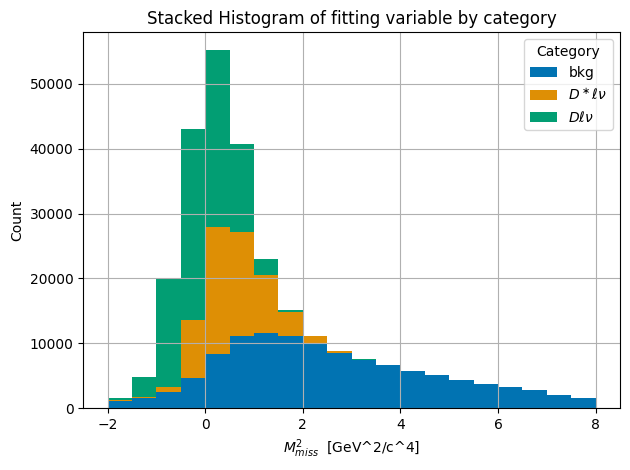

In [4]:
# choose the fitting variable to be the missing mass square, plot it
b1 = np.linspace(-2,8,21)
plot_fit_var(var='B0_CMS3_weMissM2',bins=b1)

### Note: The histograms above are from MC only, i.e. they don't take the PID Data/MC discrepency into account. We need to correct them before using as the fitting model.

## a. Load LID correction weights

In [11]:
# import yaml

# eID_eff_yaml_path = '/home/belle/zhangboy/B2SW/2025_VirginiaTech/sysvar/configs/MC15ri/eID_eff.yaml'
# eID_fake_yaml_path = '/home/belle/zhangboy/B2SW/2025_VirginiaTech/sysvar/configs/MC15ri/eID_fake.yaml'

# with open(eID_eff_yaml_path, 'r') as file:
#     eID_eff_yaml = yaml.safe_load(file)
# with open(eID_fake_yaml_path, 'r') as file:
#     eID_fake_yaml = yaml.safe_load(file)

In [17]:
# eID_eff_yaml['table_paths'] = '/home/belle/zhangboy/B2SW/2025_VirginiaTech/LID_tables_MC15ri'
# eID_fake_yaml['table_paths'] = '/home/belle/zhangboy/B2SW/2025_VirginiaTech/LID_tables_MC15ri'

# # Normal theta binning: /group/belle2/users2022/unok/leptonid/combination/perf/PID/methods/moriond_2024/proc13prompt/MC15ri/v0_coarse
# # Dense theta binning: /group/belle2/users2022/unok/leptonid/combination/perf/PID/methods/moriond_2024/proc13prompt/MC15ri/v0_dense

# # Save to the same file or a new file
# with open(eID_eff_yaml_path, 'w') as file: # or 'new_config.yaml'
#     yaml.dump(eID_eff_yaml, file, default_flow_style=False, sort_keys=False)
# with open(eID_fake_yaml_path, 'w') as file: # or 'new_config.yaml'
#     yaml.dump(eID_fake_yaml, file, default_flow_style=False, sort_keys=False)

## ⚠️ Try to install `particle` library if you get an error complaining about it
`!pip install --user particle`
### If the sysvar library is not found, you can install it by following the instruction [here](https://gitlab.desy.de/itsaklid/sysvar), the `sys.path.insert` should be changed to where your installation is

In [6]:
# Load the PID weights saved from systematic correction framework
from sysvar import add_weights_to_dataframe

add_weights_to_dataframe(
    df = df_nominal,
    systematic= "eID_eff",
    MC_production= "MC15ri",
    prefix= "ell",
    weightname ="eID_eff_weight",
    #overwrite: False,
    #Nvar: 0
)

add_weights_to_dataframe(
    df = df_nominal,
    systematic= "eID_fake",
    MC_production= "MC15ri",
    prefix= "ell",
    weightname ="eID_fake_weight",
    #overwrite: False,
    #Nvar: 0
)

INFO : get_lid_queries: 1435 :  The following cutstring has been applied to the provide LID table: (working_point == 'FixedThresh09') and (is_best_available == True) and (not ((theta_min == 0.56 and theta_max == 2.23) or (theta_min == 0.22 and theta_max == 2.71) or (p_min == 0.2 and p_max == 7) or (p_min == 0.2 and p_max == 5))) and (variable == 'pidChargedBDTScore_e') and (0 < data_MC_ratio < 10)
INFO : get_lid_queries: 1435 :  The following cutstring has been applied to the provide LID table: (working_point == 'FixedThresh09') and (is_best_available == True) and (not ((theta_min == 0.56 and theta_max == 2.23) or (theta_min == 0.22 and theta_max == 2.71) or (p_min == 0.2 and p_max == 7) or (p_min == 0.2 and p_max == 5))) and (variable == 'pidChargedBDTScore_e') and (0 < data_MC_ratio < 10)
INFO : add_weights_to_dataframe: 84 :  ell_eID_eff_weight does not exist. Adding it to dataframe
INFO : get_lid_queries: 1435 :  The following cutstring has been applied to the provide LID table: (w

In [14]:
# sample 360/fb MC as data to be fitted later
df_data = df_nominal.sample(frac=0.36).reset_index(drop=True)

# if multiple correction weights exist, combine them
# df_nominal["total_weight"] = df_nominal[["ell_eID_eff_weight", "ell_eID_fake_weight"]].product(axis = 1)
df_nominal["total_weight"] = df_nominal["ell_eID_eff_weight"]

## b. Build the nominal model with MC stat uncertainty

In [8]:
# prepare the input for model bin counts and staterror (MC stat)
category_order = ['bkg', r'$D^\ast\ell\nu$', r'$D\ell\nu$']
fit_var_col = 'B0_CMS3_weMissM2'
weight_var_col = 'ell_eID_eff_weight'
b1 = np.linspace(-2,8,21)
groups = [df_nominal[df_nominal['template'] == cat][[fit_var_col, weight_var_col]] for cat in category_order]

# calculate the histogram with PID correction weights (consider eff correction only)
hists = {}
MC_stat_error = {}
for i, name in enumerate(category_order):
    counts, edges = np.histogram(groups[i][fit_var_col],bins=b1, weights=groups[i][weight_var_col])
    staterr_squared, _ = np.histogram(groups[i][fit_var_col],bins=b1, weights=groups[i][weight_var_col]**2)
    hists[name] = counts.round(1)
    MC_stat_error[name] = np.sqrt(staterr_squared).round(1)

data, _ = np.histogram(df_data[fit_var_col],bins=b1, weights=df_data[weight_var_col])
# print(hists)
# print(MC_stat_error)

In [9]:
# create the pyhf workspace to store the model
channels = []
observations = []
measurements = [{"name": "D_ell_nu", "config": {"poi": "$D\\ell\\nu$_norm", "parameters": []}}]
version = "1.0.0"

####### Store 360/fb MC as real data to be fitted ######
observations.append({
    'name': f'channel_1',
    'data': data.round(0).tolist()  # Extract nominal values from uncertainties
})

###### Store 1/ab MC as the model #######
# Initialize channel structure
channels.append({
    'name': f'channel_1',
    'samples': []
})

# Loop over each fitting component in the channel
for sample_index, sample_name in enumerate(category_order):
    # Add the nominal template data for the sample
    channels[0]['samples'].append({
        'name': sample_name,
        'data': hists[sample_name].tolist(),
        'modifiers': [
            {
                'name': sample_name+'_norm',
                'type': 'normfactor',
                'data': None  # Normalization factor modifier
            }
        ]
    })

    # Add uncertainty modifiers for MC statistical errors
    channels[0]['samples'][sample_index]['modifiers'].append({
        'name': 'MCstat_ch1',
        'type': 'staterror',
        'data': MC_stat_error[sample_name].tolist()
    })

    # Define parameter bounds based on whether it's a background or signal sample
    if sample_name.startswith('bkg'):
        par_config = {"name": sample_name+'_norm', "bounds": [[0, 2]], "inits": [1.0], "fixed":False}
    else:
        par_config = {"name": sample_name+'_norm', "bounds": [[-5, 5]], "inits": [1.0]}

    # Add parameter configuration if it doesn't already exist
    if par_config not in measurements[0]['config']['parameters']:
        measurements[0]['config']['parameters'].append(par_config)

# Construct the workspace dictionary (input to pyhf)
spec = {
    'channels': channels,
    'measurements': measurements,
    'observations': observations,
    'version': version
}
# cabinetry.workspace.save(spec, 'workspace_1.json')

## c.  Prepare the sysvar config

In [10]:
# Load a template config file

from sysvar.utils import read_yaml

settings = read_yaml("study_setup", "MC15ri")
settings

{'output_filepath': './test_output.root',
 'reco_channel_id_column': 'channel',
 'reco_channels': {'channel1': [0], 'channel2': [1]},
 'template_id_column': 'template',
 'templates': ['signal', 'bkg'],
 'total_weight': 'total_weight',
 'MC_prod': 'MC15ri',
 'Nvar': 500,
 'bins': {'channel1': {'fit_variable1': [0, 0.2, 0.4, 0.6, 0.8, 1],
   'fit_variable2': [1, 2, 3, 4]},
  'channel2': {'fit_variable1': [0, 0.2, 0.4, 0.6, 0.8, 1],
   'fit_variable2': [1, 2, 3, 4]}},
 'systematics': {'charged_slow_pi': {'weight': 'charged_weight',
   'prefices': 'slow_pi',
   'reco_channels': {'include': None, 'exclude': None}},
  'neutral_slow_pi': {'weight': 'weight',
   'prefices': 'slow_pi',
   'reco_channels': {'include': None, 'exclude': None}}}}

In [11]:
# Specify the relevant systematics to study

settings['reco_channels'] = {'channel1':[0]}
settings['templates'] = [r'$D\ell\nu$', r'$D^\ast\ell\nu$', 'bkg']
settings['bins'] = {'channel1': {'B0_CMS3_weMissM2': b1} }
settings['systematics'] = {'eID_eff': {'weight': 'eID_eff_weight', 'prefices': 'ell', 
                                       'reco_channels': {'include': None, 'exclude': None},
                                       'templates': settings['templates'] },
                           'eID_fake': {'weight': 'eID_fake_weight', 'prefices': 'ell', 
                                        'reco_channels': {'include': None, 'exclude': None},
                                        'templates': settings['templates'] }}
settings

{'output_filepath': './test_output.root',
 'reco_channel_id_column': 'channel',
 'reco_channels': {'channel1': [0]},
 'template_id_column': 'template',
 'templates': ['$D\\ell\\nu$', '$D^\\ast\\ell\\nu$', 'bkg'],
 'total_weight': 'total_weight',
 'MC_prod': 'MC15ri',
 'Nvar': 500,
 'bins': {'channel1': {'B0_CMS3_weMissM2': array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
           3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ])}},
 'systematics': {'eID_eff': {'weight': 'eID_eff_weight',
   'prefices': 'ell',
   'reco_channels': {'include': None, 'exclude': None},
   'templates': ['$D\\ell\\nu$', '$D^\\ast\\ell\\nu$', 'bkg']},
  'eID_fake': {'weight': 'eID_fake_weight',
   'prefices': 'ell',
   'reco_channels': {'include': None, 'exclude': None},
   'templates': ['$D\\ell\\nu$', '$D^\\ast\\ell\\nu$', 'bkg']}}}

In [ ]:
# from sysvar import save_nominal_templates
# save_nominal_templates(df_nominal, settings)

## c. Eigendecomposition

In [15]:
# Generate toys, construct covariance matrix, eigendecompose it
# consider only the efficiency correction and uncertainty

from sysvar import eigendecompose

egd_eff = eigendecompose(
    df = df_nominal,
    settings = settings,
    syst_effect = "eID_eff",
    #criterion: "max_differences",
    prc= 0.01,
    #save_variations: False
)

INFO : get_lid_queries: 1435 :  The following cutstring has been applied to the provide LID table: (working_point == 'FixedThresh09') and (is_best_available == True) and (not ((theta_min == 0.56 and theta_max == 2.23) or (theta_min == 0.22 and theta_max == 2.71) or (p_min == 0.2 and p_max == 7) or (p_min == 0.2 and p_max == 5))) and (variable == 'pidChargedBDTScore_e') and (0 < data_MC_ratio < 10)
INFO : get_lid_queries: 1435 :  The following cutstring has been applied to the provide LID table: (working_point == 'FixedThresh09') and (is_best_available == True) and (not ((theta_min == 0.56 and theta_max == 2.23) or (theta_min == 0.22 and theta_max == 2.71) or (p_min == 0.2 and p_max == 7) or (p_min == 0.2 and p_max == 5))) and (variable == 'pidChargedBDTScore_e') and (0 < data_MC_ratio < 10)
INFO : create_templates: 184 :  ########## Reco channel: channel1 ##########
INFO : create_templates: 215 :  Building Template1D for $D\ell\nu$ from 93639 events
INFO : create_templates: 215 :  Buil

/cvmfs/belle.cern.ch/el9/externals/v02-03-00/Linux_x86_64/common/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/cvmfs/belle.cern.ch/el9/externals/v02-03-00/Linux_x86_64/common/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


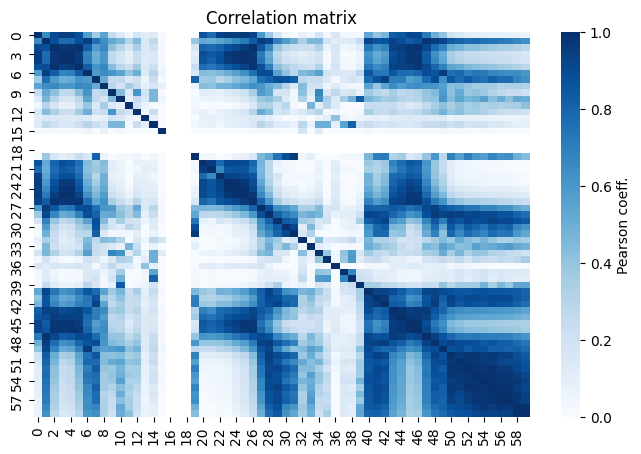

In [16]:
# plot the correlation matrix from the toys

from sysvar import plot_analysis_corr_matrix
plot_analysis_corr_matrix(egd_eff)

In [ ]:
# egd_eff.save_template_variations()

# bkg_up_1 = uproot.open('/home/belle/zhangboy/B2SW/2025_VirginiaTech/test_output.root:channel1/bkg/eID_eff_var1_up')
# bkg_up_1.values()

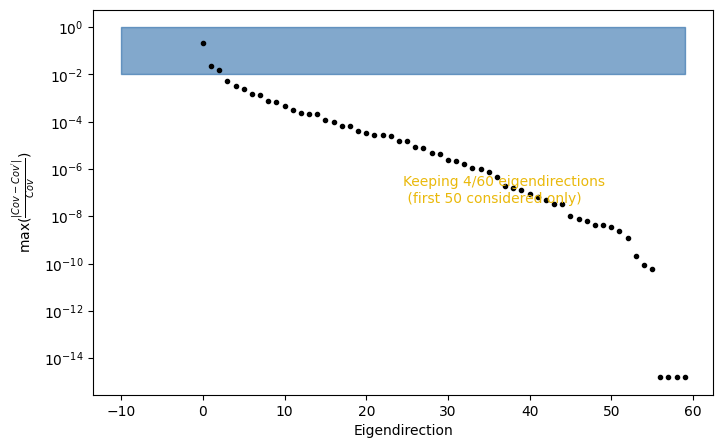

In [72]:
# plot the determination of the important eigenvectors

from sysvar import register_saving_info

si = {"top_dir": "./" }
register_saving_info(egd_eff, si)

from sysvar import plot_cov_diff
plot_cov_diff(egd_eff, save=False, filename = "test_figure_eff")

/tmp/ipykernel_794295/2817293268.py:16: RuntimeWarning: invalid value encountered in divide
  corr_trun = np.where(rr!=0,cov_trun/norm_variation,0)


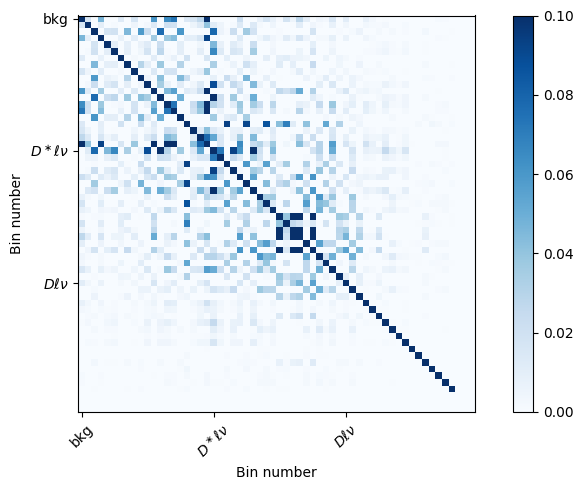

In [18]:
# Use only n eigenvectors to construct the truncated correlation matrix, plot it

def trunEigenVec(EigenVec, n):
    vec_to_keep = EigenVec[:n]
    leftover = EigenVec[n:]
    agg_leftover = np.sqrt(np.sum(leftover**2, axis=0)) # sum the rest to be an 'uncorrelated' vector
    return vec_to_keep, agg_leftover

category_order = ['bkg', r'$D^\ast\ell\nu$', r'$D\ell\nu$']
fig, ax = plt.subplots(1,1,figsize=(8,5))
corr_vecs,uncorr_vec =trunEigenVec(egd_eff.eigen_variations,3)
cov_trun = np.transpose(corr_vecs).dot(corr_vecs) +np.identity(len(uncorr_vec))*uncorr_vec**2

diag = np.diag(cov_trun)
norm_variation = np.sqrt(diag[np.newaxis,:]*diag[:,np.newaxis])
corr_trun = np.where(norm_variation!=0,cov_trun/norm_variation,0)
im = ax.imshow(corr_trun,vmin=0,vmax=0.1,cmap='Blues')
# divider = make_axes_locatable(ax[1])
# cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im)
ax.set_xticks(np.arange(0,60,20))
ax.set_xticklabels(category_order, rotation=45) #45
ax.set_yticks(np.arange(0,60,20))
ax.set_yticklabels(category_order, rotation=0)
ax.set_xlabel('Bin number')
ax.set_ylabel('Bin number')

fig.tight_layout()
# fig.patch.set_facecolor('white')

## d. Input eigenvectors and eigenvalues to our model

In [19]:
# Extract the slices of eigenvectors to be the input for pyhf

def chunk_dict_from_list(vectors, nkeep, chunk_size):
    """
    Split the first `nkeep` elements of vectors (a list of lists) into `chunk_size` chunks and store in a dict.
    
    Returns:
        dict with keys as category and values as list of lists (nkeep elements, each with chunk_size numbers)
    """
    result = {}
    for i in range(0, len(vectors), chunk_size):
        # Extract slice [i : i + chunk_size] from the first nkeep lists in vectors
        chunk = [row[i:i+chunk_size] for row in vectors[:nkeep]]
        result[category_order[i // chunk_size]] = chunk
    return result

# keep the first 4 eigenvectors and eigenvalues
eigenvectors = chunk_dict_from_list(egd_eff.eigen_vectors, nkeep=4, chunk_size=20)
eigenvalues = egd_eff.eigen_values[:4]

# add the eigenvalues and eigenvectors to the pyhf model

for sample in spec['channels'][0]['samples']:
    name   = sample['name']
    yields = sample['data']
    uncer_vecs = eigenvectors[name]
    
    for i, vec in enumerate(uncer_vecs):
        sample['modifiers'].append(
            {   
                'name': f'pid_{i}',
                'type': 'normsys',
                'data': {
                        "hi": 1 + np.sqrt(eigenvalues[i])/sum(yields),
                        "lo": 1 - np.sqrt(eigenvalues[i])/sum(yields)
                }
            }
        )
        
        sample['modifiers'].append(
            {   
                'name': f'pid_{i}',
                'type': 'histosys',
                'data': {
                        'hi_data': (np.array(yields)+np.sqrt(eigenvalues[i])*np.array(vec)).tolist(),
                        'lo_data': (np.array(yields)-np.sqrt(eigenvalues[i])*np.array(vec)).tolist()
                }
            }
        )

In [20]:
# !pip install --user pyhf
# !pip install --user cabinetry

import cabinetry
import pyhf

INFO : __init__: 312 :  Validating spec against schema: workspace.json
INFO : __init__: 768 :  Validating spec against schema: model.json
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_0 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_1 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_2 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_3 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier bkg_norm (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier MCstat_ch1 (20 new nuisance parameters)
INFO : _save_and_close: 27 :  saving figure as figures/modif

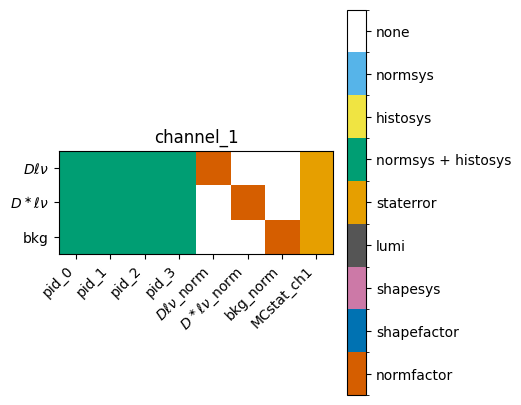

In [21]:
# Visualize the model and systematics setup
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec).model())

In [22]:
# Load model and data from workspace
model, data = cabinetry.model_utils.model_and_data(spec)

INFO : __init__: 312 :  Validating spec against schema: workspace.json
INFO : __init__: 768 :  Validating spec against schema: model.json
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_0 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_1 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_2 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier pid_3 (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier bkg_norm (1 new nuisance parameters)
INFO : _create_and_register_paramsets: 478 :  adding modifier MCstat_ch1 (20 new nuisance parameters)


INFO : _save_and_close: 27 :  saving figure as figures/channel_1_prefit.pdf


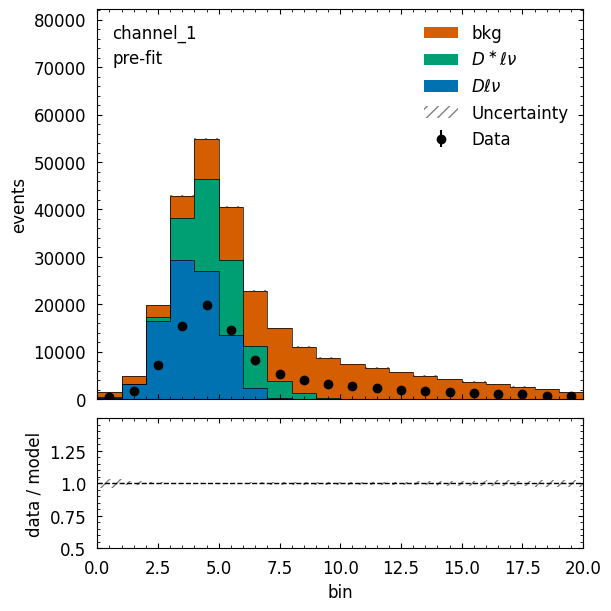

In [23]:
# Plot model and data before fit
model_pred_prefit = cabinetry.model_utils.prediction(model)
pre_plot = cabinetry.visualize.data_mc(model_pred_prefit, data=data);

In [24]:
# perform the fit
fit_results = cabinetry.fit.fit(model=model, data=data, goodness_of_fit=True,
                                init_pars=[1]*4+[0.36]*3+[1]*20)

INFO : fit: 478 :  performing maximum likelihood fit
INFO : _fit_model_pyhf: 108 :  Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 66.25                      │              Nfcn = 955              │
│ EDM = 0.00019 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────────────────────────

INFO : _save_and_close: 27 :  saving figure as figures/channel_1_postfit.pdf


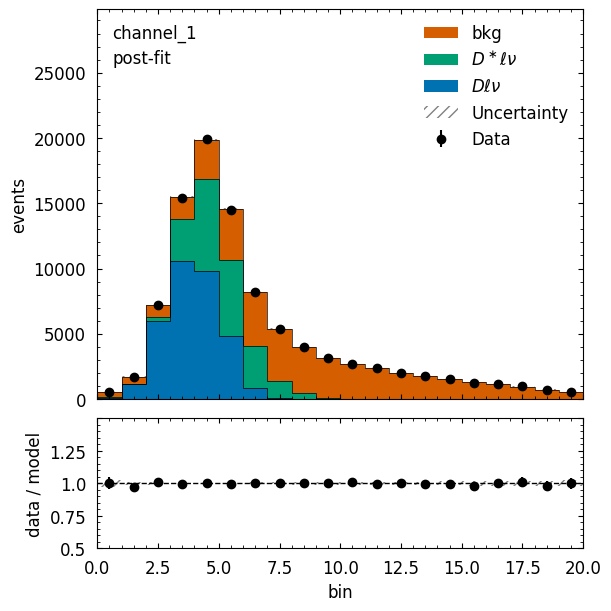

In [25]:
# plot the model and data after the fit
model_pred_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
p = cabinetry.visualize.data_mc(model_pred_postfit, data=data);

In [ ]:
# plot the pulls for fitting parameters
cabinetry.visualize.pulls(fit_results)

INFO : _save_and_close: 27 :  saving figure as figures/correlation_matrix.pdf


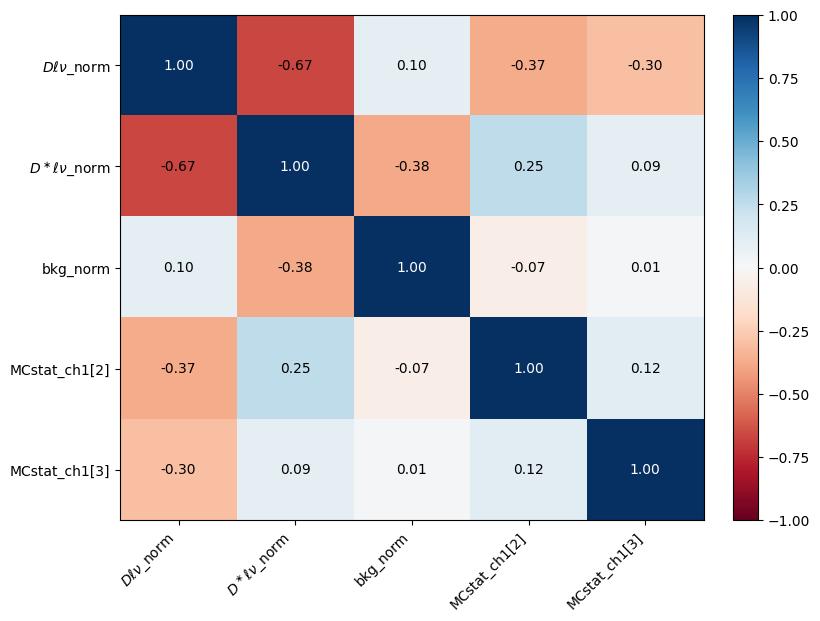

In [90]:
# plot correlation matrix for fitting parameters
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.3)